In [87]:
import requests
import pandas as pd
import numpy as np
import folium

In [88]:
api_key = 'f4cff5113d01d09ca915b3b5fa0f7c0a'
location = 'London'
url = f'http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}'

response = requests.get(url)
weather_data = response.json()

In [89]:
weather_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1731261600,
   'main': {'temp': 283.49,
    'feels_like': 282.96,
    'temp_min': 282.93,
    'temp_max': 283.49,
    'pressure': 1028,
    'sea_level': 1028,
    'grnd_level': 1026,
    'humidity': 91,
    'temp_kf': 0.56},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}],
   'clouds': {'all': 92},
   'wind': {'speed': 2.15, 'deg': 249, 'gust': 6.61},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-11-10 18:00:00'},
  {'dt': 1731272400,
   'main': {'temp': 283.72,
    'feels_like': 283.23,
    'temp_min': 283.7,
    'temp_max': 283.72,
    'pressure': 1030,
    'sea_level': 1030,
    'grnd_level': 1027,
    'humidity': 92,
    'temp_kf': 0.02},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}],
   'clouds': {'all': 99},
   'wind': {'speed': 2.11, 'deg': 249, 'gust': 7.21},
   

In [90]:
for forecast in weather_data['list']:
    date = forecast['dt_txt']
    temp = forecast['main']['temp']
    description = forecast['weather'][0]['description']
    print(f"Date & Time {date}, Temp: {temp-273.15}, Weather: {description}")

Date & Time 2024-11-10 18:00:00, Temp: 10.340000000000032, Weather: overcast clouds
Date & Time 2024-11-10 21:00:00, Temp: 10.57000000000005, Weather: overcast clouds
Date & Time 2024-11-11 00:00:00, Temp: 10.740000000000009, Weather: overcast clouds
Date & Time 2024-11-11 03:00:00, Temp: 10.82000000000005, Weather: overcast clouds
Date & Time 2024-11-11 06:00:00, Temp: 9.200000000000045, Weather: overcast clouds
Date & Time 2024-11-11 09:00:00, Temp: 9.230000000000018, Weather: overcast clouds
Date & Time 2024-11-11 12:00:00, Temp: 10.700000000000045, Weather: overcast clouds
Date & Time 2024-11-11 15:00:00, Temp: 10.660000000000025, Weather: broken clouds
Date & Time 2024-11-11 18:00:00, Temp: 8.680000000000007, Weather: scattered clouds
Date & Time 2024-11-11 21:00:00, Temp: 7.6299999999999955, Weather: few clouds
Date & Time 2024-11-12 00:00:00, Temp: 7.050000000000011, Weather: clear sky
Date & Time 2024-11-12 03:00:00, Temp: 6.490000000000009, Weather: clear sky
Date & Time 2024-

In [91]:
weather_data = weather_data['list']
timestamps = [entry['dt'] for entry in weather_data]
temperature = [entry['main']['temp'] for entry in weather_data]
humidity = [entry['main']['humidity'] for entry in weather_data]
wind_speed = [entry['wind']['speed'] for entry in weather_data]
weather_description = [entry['weather'][0]['description'] for entry in weather_data]

In [92]:
datetime_obj = [pd.to_datetime(timestamp,unit="s") for timestamp in timestamps]

In [93]:
weather_df = pd.DataFrame({
    'Timestamp':timestamps,
    'Datetime':datetime_obj,
    'Temperature':temperature,
    'humidity':humidity,
    'wind_speed':wind_speed,
    'weather_description':weather_description
})

In [94]:
weather_df.head()

,Timestamp,Datetime,Temperature,humidity,wind_speed,weather_description
0,1731261600,2024-11-10 18:00:00,283.49,91,2.15,overcast clouds
1,1731272400,2024-11-10 21:00:00,283.72,92,2.11,overcast clouds
2,1731283200,2024-11-11 00:00:00,283.89,92,2.22,overcast clouds
3,1731294000,2024-11-11 03:00:00,283.97,80,3.79,overcast clouds
4,1731304800,2024-11-11 06:00:00,282.35,75,3.25,overcast clouds


In [95]:
precipitation = []
for entry in weather_data:
    rain = entry.get('rain',{}).get('3h',0)
    snow = entry.get('snow',{}).get('3h',0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)

In [96]:
avg_temp = sum(temperature) / len(temperature)
avg_temp - 273.15

9.478499999999997

In [97]:
max_temp = max(temperature)
max_temp

285.89

In [98]:
min_temp = temperature[np.argmin(
    temperature
)]

In [99]:
min_temp

279.52

In [100]:
weather_df.set_index('Datetime', inplace=True)

In [101]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

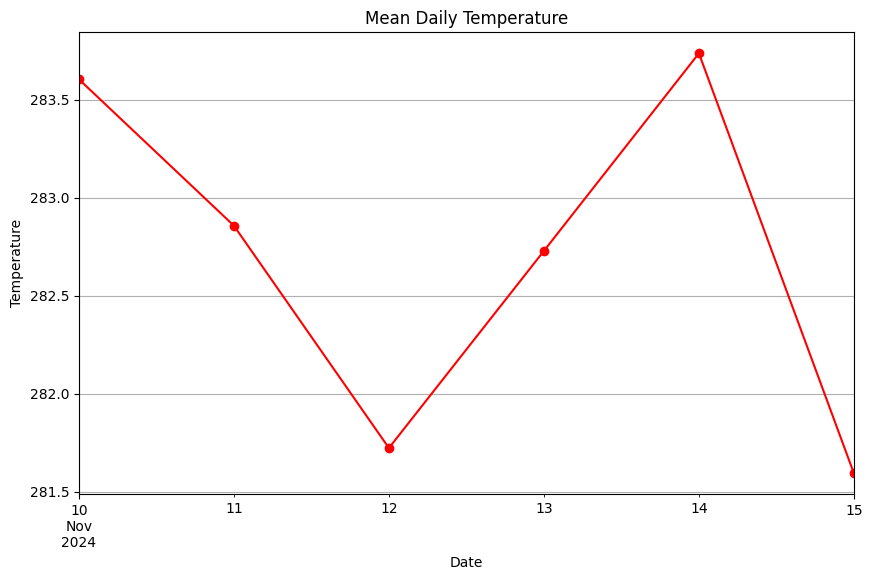

In [102]:
plt.figure(figsize=(10,6))
daily_mean_temp.plot(color='red',linestyle='-',marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

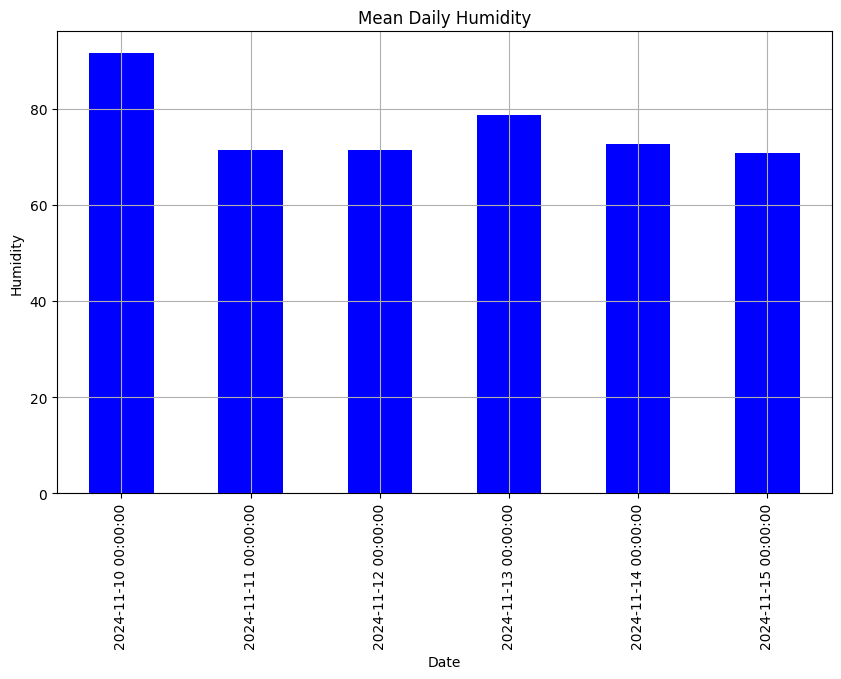

In [106]:
plt.figure(figsize=(10,6))
daily_mean_humidity.plot(kind='bar',color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

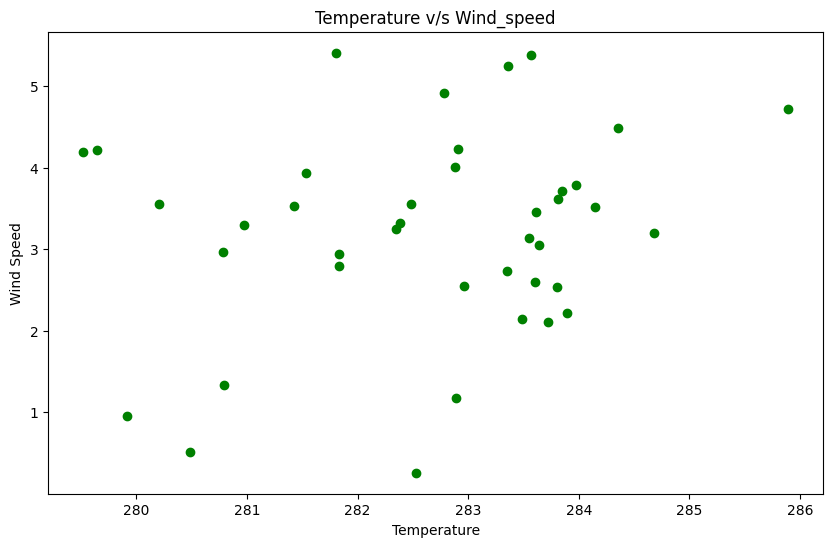

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df['Temperature'],weather_df['wind_speed'],color='green')
plt.title('Temperature v/s Wind_speed')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.show()

In [109]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2024-11-10 18:00:00 to 2024-11-15 15:00:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            40 non-null     int64  
 1   Temperature          40 non-null     float64
 2   humidity             40 non-null     int64  
 3   wind_speed           40 non-null     float64
 4   weather_description  40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB


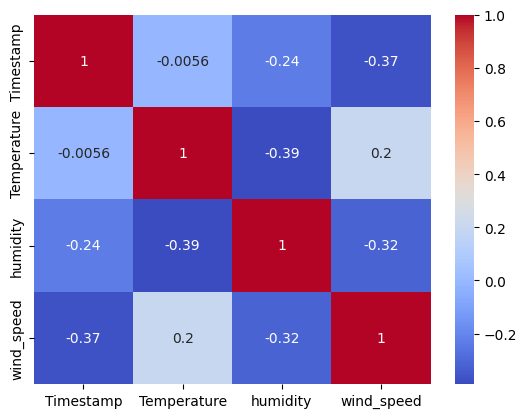

In [115]:
weather_df_copy = weather_df.copy()
weather_df_copy.drop(columns=['weather_description'],inplace=True)
import seaborn as sns
sns.heatmap(weather_df_copy.corr(),annot=True,cmap='coolwarm')
plt.show()